In [9]:
import numpy as np
import pandas as pd
from itertools import izip_longest
%load_ext rpy2.ipython

In [11]:
%%R
library(dplyr)
library(readr)
library(ggplot2)

In [ ]:
#!msa.sh in=data/SILVA123_QIIME_release/rep_set/rep_set_all/97/97_otus.fasta out=data/primer1.sam \
#literal=GTGCCAGCMGCCGCGGTAA threads=20

In [ ]:
#!msa.sh in=data/SILVA123_QIIME_release/rep_set/rep_set_all/97/97_otus.fasta out=data/primer2.sam \
#literal=GGACTACHVGGGTWTCTAAT threads=20

In [ ]:
#!cutprimers.sh \
#in=data/SILVA123_QIIME_release/rep_set/rep_set_all/97/97_otus.fasta \
#out=data/SILVA123_QIIME_release/rep_set/rep_set_all/97/V4.fa \
#sam1=data/primer1.sam sam2=data/primer2.sam

In [47]:
%%bash
assign_taxonomy.py \
-i data/EC_fasta.fa \
-r data/SILVA123_QIIME_release/rep_set/rep_set_all/97/V4.fa \
-t data/SILVA123_QIIME_release/taxonomy/taxonomy_all/97/raw_taxonomy.txt \
--similarity 0.80 \
-o data/uclust_tax

In [48]:
tax_str = []

with open("data/uclust_tax/EC_fasta_tax_assignments.txt") as fh:
    for line in fh:
        tax_str.append(line.split("\t")[1])

In [49]:
max_rank = np.array([s.count(";") for s in tax_str]).max() + 1
max_rank

7

In [50]:
ranks = ["Rank" + str(i+1) for i in range(7)]
ranks

['Rank1', 'Rank2', 'Rank3', 'Rank4', 'Rank5', 'Rank6', 'Rank7']

In [51]:
data = {}
tax = {}

with open("data/uclust_tax/EC_fasta_tax_assignments.txt") as fh:
    for line in fh:
        seq_id, tax_str, consensus, count = line.rstrip().split("\t")
        data[seq_id] = {"consensus" : consensus, "count" : count}
        
        taxa = tax_str.split(";")
        
        taxa_d = {}
        
        for (t, rank) in izip_longest(taxa, ranks, fillvalue="NA"):
            taxa_d[rank] = t
        
        tax[seq_id] = taxa_d

In [52]:
df1 = pd.DataFrame.from_dict(tax, orient="index")
df2 = pd.DataFrame.from_dict(data, orient="index")

In [53]:
df_tax = df1.join(df2)
df_tax.reset_index(inplace=True)
df_tax.rename(columns={"index" : "seq_id"}, inplace=True)
df_tax.to_csv("data/tax_table.csv", header=True, index=False)

In [32]:
!head -n1 data/tax_table.csv && grep "Chloro" data/tax_table.csv

seq_id,Rank3,Rank2,Rank1,Rank7,Rank6,Rank5,Rank4,consensus,count
Sequence.1011,Chloroplast,Cyanobacteria,Bacteria,NA,NA,NA,NA,1.00,3
Sequence.1028,NA,Chloroflexi,Bacteria,NA,NA,NA,NA,0.67,3
Sequence.1062,Anaerolineae,Chloroflexi,Bacteria,uncultured bacterium,uncultured,Anaerolineaceae,Anaerolineales,0.67,3
Sequence.1088,Caldilineae,Chloroflexi,Bacteria,NA,uncultured,Caldilineaceae,Caldilineales,1.00,3
Sequence.1089,SAR202 clade,Chloroflexi,Bacteria,NA,NA,NA,NA,1.00,3
Sequence.1106,Chloroflexia,Chloroflexi,Bacteria,NA,uncultured bacterium,AKIW781,Kallotenuales,1.00,3
Sequence.1115,Chloroplast,Cyanobacteria,Bacteria,NA,NA,NA,NA,1.00,3
Sequence.1141,Chloroplast,Cyanobacteria,Bacteria,NA,NA,NA,NA,1.00,3
Sequence.1143,KD4-96,Chloroflexi,Bacteria,NA,NA,NA,NA,0.67,3
Sequence.1165,Caldilineae,Chloroflexi,Bacteria,NA,uncultured,Caldilineaceae,Caldilineales,1.00,3
Sequence.1191,Chloroplast,Cyanobacteria,Bacteria,NA,NA,NA,uncultured bacterium,0.67,3
Sequence.1200,Anaerolineae,Chloroflexi,Bacteria

In [34]:
!head -n1 data/tax_table.csv && grep "Mitochondria" data/tax_table.csv

seq_id,Rank3,Rank2,Rank1,Rank7,Rank6,Rank5,Rank4,consensus,count
Sequence.1158,Alphaproteobacteria,Proteobacteria,Bacteria,NA,uncultured bacterium,Mitochondria,Rickettsiales,0.67,3
Sequence.2003,Alphaproteobacteria,Proteobacteria,Bacteria,NA,uncultured bacterium,Mitochondria,Rickettsiales,0.67,3
Sequence.2055,Alphaproteobacteria,Proteobacteria,Bacteria,NA,NA,Mitochondria,Rickettsiales,1.00,3
Sequence.208,Alphaproteobacteria,Proteobacteria,Bacteria,NA,uncultured bacterium,Mitochondria,Rickettsiales,0.67,3
Sequence.213,Alphaproteobacteria,Proteobacteria,Bacteria,NA,uncultured bacterium,Mitochondria,Rickettsiales,0.67,3
Sequence.2267,Alphaproteobacteria,Proteobacteria,Bacteria,NA,Triticum aestivum (bread wheat),Mitochondria,Rickettsiales,0.67,3
Sequence.2301,Alphaproteobacteria,Proteobacteria,Bacteria,NA,NA,Mitochondria,Rickettsiales,1.00,2
Sequence.2316,Alphaproteobacteria,Proteobacteria,Bacteria,NA,uncultured bacterium,Mitochondria,Rickettsiales,0.67,3
Sequence.2573,Alphaproteobacteria,

In [14]:
!bioawk -c fastx '{if ( $name == "Sequence.1") print $seq}' data/EC_fasta.fa

GCGAGCGTTATCCGGATTTATTGGGCGTAAAGAGTGCACAGGTGGTTGAGAAAGTTAATTGTTAAATCCCAGGGCTCAACCCTGGTCCGCAGTTAAAACTTCTCGACTAGAATATAGGTGGGGGTAGTAGAATTCCATATGTAGCGGTGGAATGCATAAATATATGGAGGAATACCAGCGGCGAAGGCGGCTACCTGAACTATTATTGACACTTAAGCACGAAAGCGTGGGG


In [54]:
%%R
df = read_csv("data/EC_table.csv") %>%
    tidyr::gather(sample, abund, -seq_id) %>%
    left_join(read_csv("data/tax_table.csv")) 

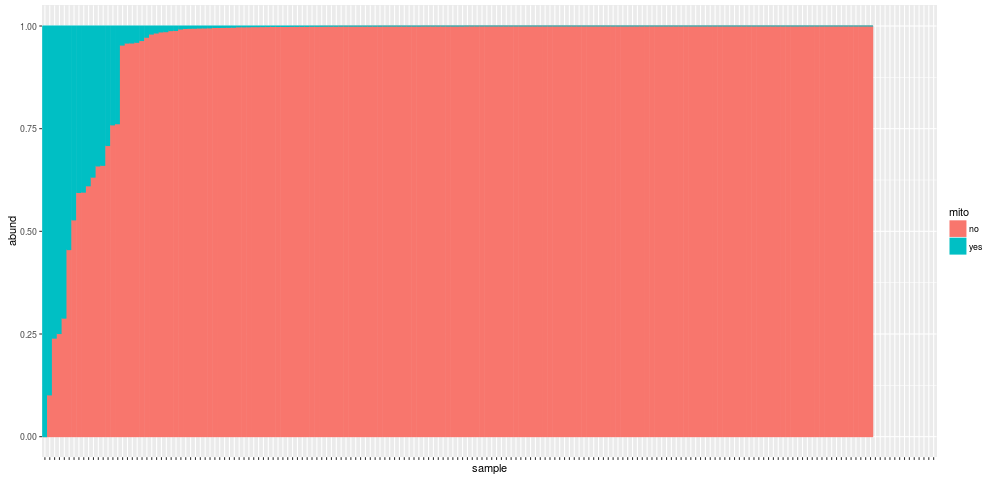

In [36]:
%%R -w 1000
d = df %>%
    mutate(mito = ifelse(Rank1 %in% c("Archaea"), "yes", "no")) %>%
    group_by(sample, mito) %>%
    summarize(abund = sum(abund)) %>%
    group_by(sample) %>%
    mutate(abund = abund / sum(abund)) %>% {
        ord = filter(., mito == "yes") %>% 
            ungroup() %>%
            arrange(desc(abund)) %>%
            magrittr::extract2("sample")
        .$sample = factor(.$sample, levels = ord)
        .
    }

p = ggplot(d, aes(x = sample, y = abund, color = mito, fill = mito))

p = p + geom_bar(stat = "identity", position = "stack")

p = p + theme(axis.text.x = element_blank())

p

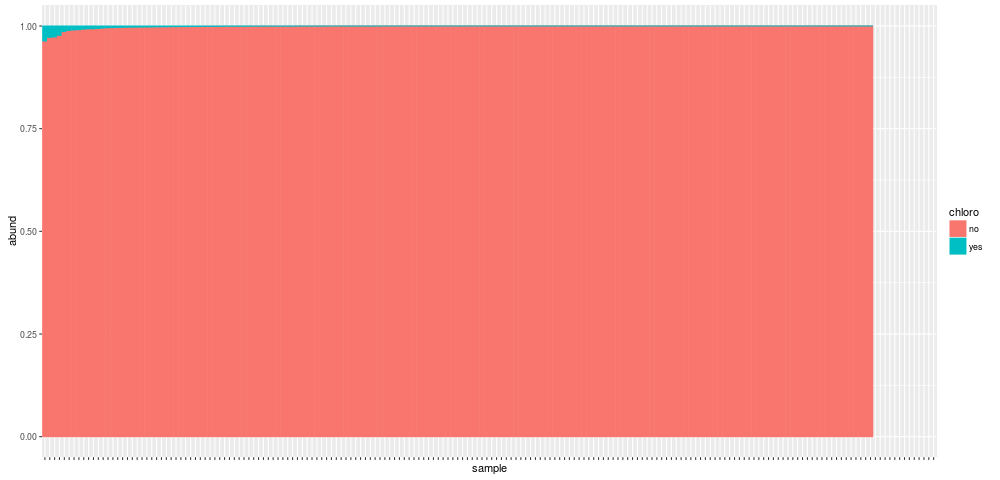

In [37]:
%%R -w 1000
d = df %>%
    mutate(chloro = ifelse(Rank1 %in% c("Unassigned"), "yes", "no")) %>%
    group_by(sample, chloro) %>%
    summarize(abund = sum(abund)) %>%
    group_by(sample) %>%
    mutate(abund = abund / sum(abund)) %>% {
        ord = filter(., chloro == "yes") %>% 
            ungroup() %>%
            arrange(desc(abund)) %>%
            magrittr::extract2("sample")
        .$sample = factor(.$sample, levels = ord)
        .
    }

p = ggplot(d, aes(x = sample, y = abund, color = chloro, fill = chloro))

p = p + geom_bar(stat = "identity", position = "stack")

p = p + theme(axis.text.x = element_blank())

p